In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
# load data
r_data = pd.read_csv("../result/join_weather_flower/Rose_C0H960_草屯.csv")
r_data = r_data.dropna()
# select year
# gb_df  = r_data.groupby("year")
# r_data = gb_df.get_group(2014.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")
r_data["d_temp"] = r_data['T.Max'] - r_data['T.Min']
d = np.array(r_data["Date"])
day_new=[]
for date in d:
    day_new.append(int(date.split("-")[-1]))
r_data["date_of_m"] = day_new
# r_data
tg = "avg_price"
col_x =  ['Temperature', 'T.Max', 'T.Min', 'Precp', 
          'RH', 'StnPres', 'WS', 'WSGust', "year",
          "week","d_temp","date_of_m"]
# rm "/"
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new

x_raw = r_data[col_x]
y_raw = r_data[tg]

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_raw, 
                                                    y_raw, 
                                                    test_size=0.1)


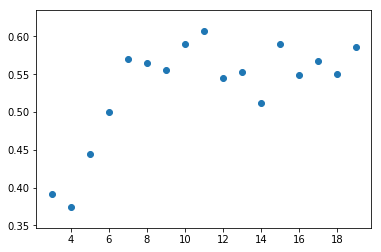

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import graphviz
from sklearn.tree import export_graphviz
r2_l = []
for k in range(3,20):
    reg = DecisionTreeRegressor(max_depth=k)
    # 訓練考古題
    reg.fit(x_train, y_train)
    g = export_graphviz(reg, feature_names=col_x, filled=True)
    result = graphviz.Source(g)
    # result.render("avg_price")
    pre = reg.predict(x_test)
    r2 =  r2_score(y_test, pre)
#     print("k:",k, "\t",r2)
    r2_l.append(r2)
# df_show = pd.DataFrame()
# df_show["pd"]= np.array(reg.predict(x_test))
# df_show["ans"] = np.array(y_test)
# df_show.to_csv("test0504ML.csv", index=False)
# df_show.corr()
# result
matplotlib.pyplot.scatter(range(3,20),r2_l)

In [4]:
reg = DecisionTreeRegressor(max_depth=7)
# 訓練考古題
reg.fit(x_train, y_train)
g = export_graphviz(reg, feature_names=col_x, filled=True)
result = graphviz.Source(g)
# result.render("avg_price")
pre = reg.predict(x_test)
r2 =  r2_score(y_test, pre)
print("k:",7, "\t",r2)
# r2_l.append(r2)
df_show = pd.DataFrame()
df_show["pd"]= np.array(reg.predict(x_test))
df_show["ans"] = np.array(y_test)
df_show.to_csv("test0504ML.csv", index=False)
df_show.corr()

k: 7 	 0.5466197911106501


,pd,ans
pd,1.000000,0.740635
ans,0.740635,1.000000
